In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('C:\jintu\DATA\Formated data_resampled 1H MY1\MY1 2023.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\jintu\\DATA\\Formated data_resampled 1H MY1\\MY1 2023.csv'

In [227]:
start_date = '2023-03-07'
end_date   = '2023-04-14'

# Select DataFrame rows between two dates
mask = (df['created_at'] > start_date) & (df['created_at'] <= end_date)
df2 = df.loc[mask]

In [228]:
df2

,created_at,id,field1,field2,field3,field4,field5,field6,field7,field8
5296,2023-03-07 00:00:00,580658.0,25.860024,32.534930,781.788618,0.0,29.000000,69.333333,39.733333,48.733333
5297,2023-03-07 00:15:00,580673.0,20.877817,27.345309,545.691057,0.0,29.000000,67.333333,38.200000,47.133333
5298,2023-03-07 00:30:00,580688.0,21.352313,29.740519,433.495935,0.0,28.400000,66.866667,36.600000,44.733333
5299,2023-03-07 00:45:00,580703.0,24.199288,31.536926,491.382114,0.0,28.000000,67.866667,36.800000,45.400000
5300,2023-03-07 01:00:00,580718.0,26.097272,31.536926,812.682927,0.0,28.666667,69.533333,37.133333,46.200000
...,...,...,...,...,...,...,...,...,...,...
8939,2023-04-13 22:45:00,635185.0,31.791222,40.518962,935.284553,0.0,29.000000,74.666667,39.466667,47.266667
8940,2023-04-13 23:00:00,635200.0,26.097272,38.522954,838.373984,0.0,29.000000,74.000000,42.066667,51.666667
8941,2023-04-13 23:15:00,635215.0,28.469751,35.728543,955.447154,0.0,29.000000,74.266667,38.666667,47.133333
8942,2023-04-13 23:30:00,635230.0,27.995255,36.526946,898.861789,0.0,29.000000,73.933333,38.733333,46.800000


<AxesSubplot:>

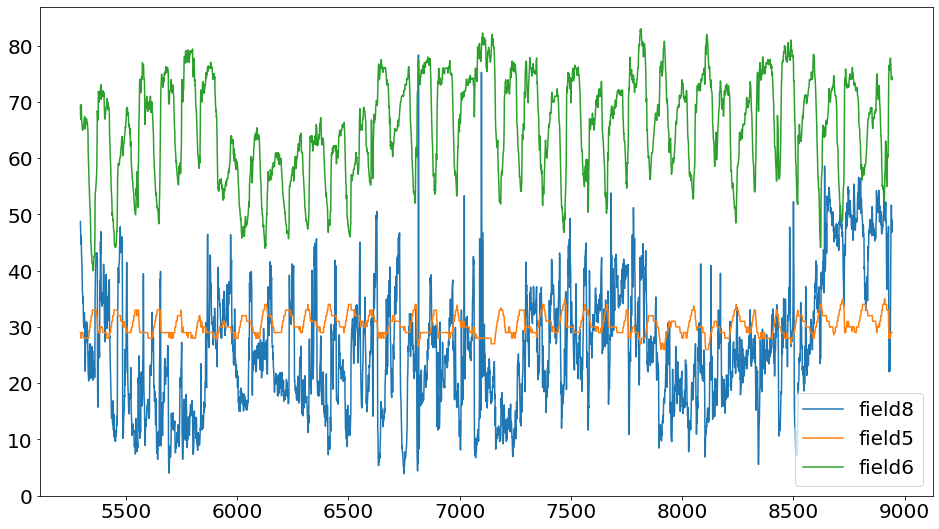

In [310]:
var = ['field8','field5','field6']
df2[var].plot(figsize=(16,9))

In [311]:
data = df2[var].reset_index(drop=True)
data

,field8,field5,field6
0,48.733333,29.000000,69.333333
1,47.133333,29.000000,67.333333
2,44.733333,28.400000,66.866667
3,45.400000,28.000000,67.866667
4,46.200000,28.666667,69.533333
...,...,...,...
3643,47.266667,29.000000,74.666667
3644,51.666667,29.000000,74.000000
3645,47.133333,29.000000,74.266667
3646,46.800000,29.000000,73.933333


In [231]:
# Min-Max Normalization
df_norm = (data-data.min())/(data.max()-data.min())
#df_norm = pd.concat((df_norm, data.species), 1)
 
print("Scaled Dataset Using Pandas")
df_norm.head()

Scaled Dataset Using Pandas


,field1,field5,field6
0,0.355049,0.333333,0.682171
1,0.286645,0.333333,0.635659
2,0.293160,0.266667,0.624806
3,0.332248,0.222222,0.648062
4,0.358306,0.296296,0.686822


In [232]:
values = data.values
n_train_hours = int((60/15)*24*31)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# print(len(values)
print(len(train))
print(len(test))

2976
672


In [182]:
n_val = len(train) - len(test)

# split into input and outputs
train_X, train_y = train[:n_val, 1:], train[:n_val, 0]
val_X, val_y = train[n_val:, 1:], train[n_val:,0]
test_X, test_y = test[:, 1:], test[:, 0]

In [183]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)

(2304, 1, 2) (2304,) (672, 1, 2) (672,) (672, 1, 2) (672,)


Epoch 1/60
576/576 - 5s - loss: 11.3082 - val_loss: 8.7634 - 5s/epoch - 9ms/step
Epoch 2/60
576/576 - 3s - loss: 9.1163 - val_loss: 8.1418 - 3s/epoch - 5ms/step
Epoch 3/60
576/576 - 3s - loss: 8.8017 - val_loss: 9.2246 - 3s/epoch - 5ms/step
Epoch 4/60
576/576 - 3s - loss: 9.3334 - val_loss: 9.3816 - 3s/epoch - 5ms/step
Epoch 5/60
576/576 - 3s - loss: 9.1889 - val_loss: 8.5125 - 3s/epoch - 5ms/step
Epoch 6/60
576/576 - 3s - loss: 9.1298 - val_loss: 8.4510 - 3s/epoch - 5ms/step
Epoch 7/60
576/576 - 3s - loss: 9.0215 - val_loss: 8.0758 - 3s/epoch - 5ms/step
Epoch 8/60
576/576 - 3s - loss: 8.9485 - val_loss: 7.8542 - 3s/epoch - 5ms/step
Epoch 9/60
576/576 - 3s - loss: 8.8567 - val_loss: 7.8112 - 3s/epoch - 5ms/step
Epoch 10/60
576/576 - 3s - loss: 8.8268 - val_loss: 7.0683 - 3s/epoch - 5ms/step
Epoch 11/60
576/576 - 3s - loss: 8.5206 - val_loss: 8.2425 - 3s/epoch - 5ms/step
Epoch 12/60
576/576 - 3s - loss: 8.5861 - val_loss: 6.7682 - 3s/epoch - 5ms/step
Epoch 13/60
576/576 - 3s - loss: 8.3

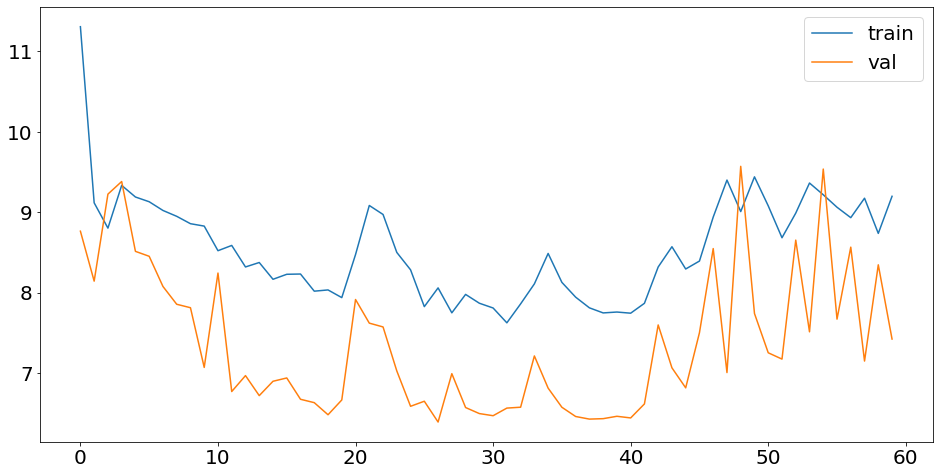

In [184]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=60, batch_size=4, validation_data=(val_X, val_y), verbose=2, shuffle=False)
# plot history
fig = pyplot.figure()
fig.set_size_inches(16, 8)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [185]:
# make a prediction
yhat = model.predict(test_X)

21/21 [==============================] - 1s 2ms/step


In [186]:
test_X.shape

(672, 1, 2)

In [187]:
print(yhat.shape)
print(test_y.shape)

(672, 1)
(672,)


In [188]:
yhat[0]

array([11.623224], dtype=float32)

In [189]:
target = 'field7'

In [190]:
yhat = yhat.reshape(test_y.shape)
yhat = (yhat*(data[target].max()-data[target].min())) + data[target].min()

In [191]:
print(yhat.shape)
print(test_y.shape)

(672,)
(672,)


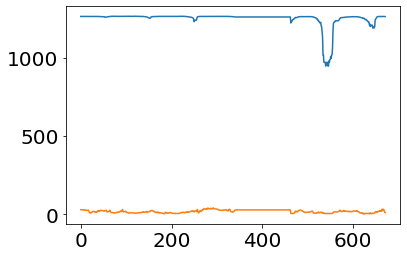

In [192]:
import matplotlib.pyplot as plt
plt.plot(yhat)
plt.plot(test_y)
plt.show()

In [82]:
test_y

array([23.48754448, 23.01304864, 21.35231317, 24.43653618, 25.38552788,
       22.30130486, 19.92882562, 23.48754448, 23.01304864, 21.82680902,
       19.92882562, 23.01304864, 20.16607355, 17.79359431, 18.742586  ,
       21.58956109, 24.19928826, 24.19928826, 14.94661922, 12.8113879 ,
       13.28588375,  9.48991696, 15.65836299, 17.31909846, 14.47212337,
       14.94661922, 12.8113879 , 10.91340451, 15.42111507, 11.38790036,
        8.30367734,  5.08388409,  7.11743772, 13.04863582, 14.94661922,
       11.38790036, 13.99762752, 15.89561091, 18.03084223, 17.55634638,
       17.31909846, 14.94661922, 19.6915777 , 30.36773428, 30.36773428,
       33.68920522, 34.87544484, 35.11269276, 32.97746145, 31.5539739 ,
       30.36773428, 34.87544484, 32.02846975, 22.53855279, 31.07947805,
       27.52075919, 31.79122183, 31.79122183, 33.4519573 , 27.99525504,
       36.77342823, 32.02846975, 41.28113879, 26.80901542, 32.5029656 ,
       30.84223013, 29.89323843, 22.53855279, 22.06405694, 21.82

In [325]:
data

,field8,field5,field6
0,48.733333,29.000000,375.0
1,47.133333,29.000000,343.0
2,44.733333,28.400000,336.0
3,45.400000,28.000000,351.0
4,46.200000,28.666667,379.0
...,...,...,...
3643,47.266667,29.000000,456.0
3644,51.666667,29.000000,446.0
3645,47.133333,29.000000,450.0
3646,46.800000,29.000000,445.0


In [326]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
# dataset = read_csv('f.csv', header=0, index_col=0)
values = data.values
# integer encode direction
encoder = LabelEncoder()
values[:,2] = encoder.fit_transform(values[:,2])
# ensure all data is float
np.delete(values,0,0)
values = DataFrame(values)
values = values.iloc[:]
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)   var2(t)   var3(t)
1   0.602151   0.333333   0.662544  0.580645  0.333333  0.606007
2   0.580645   0.333333   0.606007  0.548387  0.266667  0.593640
3   0.548387   0.266667   0.593640  0.557348  0.222222  0.620141
4   0.557348   0.222222   0.620141  0.568100  0.296296  0.669611
5   0.568100   0.296296   0.669611  0.522401  0.333333  0.606007


In [327]:
# split into train and test sets
values = reframed.values
n_train_hours = int((60/15)*24*31)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# print(len(values)
print(len(train))
print(len(test))

2976
671


In [328]:
n_val = len(train)-len(test)

# split into input and outputs
train_X, train_y = train[:n_val, :], train[:n_val, 0]
val_X, val_y = train[n_val:, :], train[n_val:,0]
test_X, test_y = test[:, ], test[:, 0]
print(type(test_X))

<class 'numpy.ndarray'>


In [329]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)

(2305, 1, 6) (2305,) (671, 1, 6) (671,) (671, 1, 6) (671,)


Epoch 1/15
25/25 - 3s - loss: 0.1955 - val_loss: 0.1144 - 3s/epoch - 115ms/step
Epoch 2/15
25/25 - 0s - loss: 0.0954 - val_loss: 0.0802 - 183ms/epoch - 7ms/step
Epoch 3/15
25/25 - 0s - loss: 0.0898 - val_loss: 0.0755 - 195ms/epoch - 8ms/step
Epoch 4/15
25/25 - 0s - loss: 0.0813 - val_loss: 0.0690 - 176ms/epoch - 7ms/step
Epoch 5/15
25/25 - 0s - loss: 0.0741 - val_loss: 0.0617 - 180ms/epoch - 7ms/step
Epoch 6/15
25/25 - 0s - loss: 0.0659 - val_loss: 0.0542 - 171ms/epoch - 7ms/step
Epoch 7/15
25/25 - 0s - loss: 0.0567 - val_loss: 0.0452 - 187ms/epoch - 7ms/step
Epoch 8/15
25/25 - 0s - loss: 0.0463 - val_loss: 0.0353 - 175ms/epoch - 7ms/step
Epoch 9/15
25/25 - 0s - loss: 0.0351 - val_loss: 0.0250 - 178ms/epoch - 7ms/step
Epoch 10/15
25/25 - 0s - loss: 0.0239 - val_loss: 0.0178 - 175ms/epoch - 7ms/step
Epoch 11/15
25/25 - 0s - loss: 0.0186 - val_loss: 0.0161 - 176ms/epoch - 7ms/step
Epoch 12/15
25/25 - 0s - loss: 0.0161 - val_loss: 0.0158 - 179ms/epoch - 7ms/step
Epoch 13/15
25/25 - 0s - l

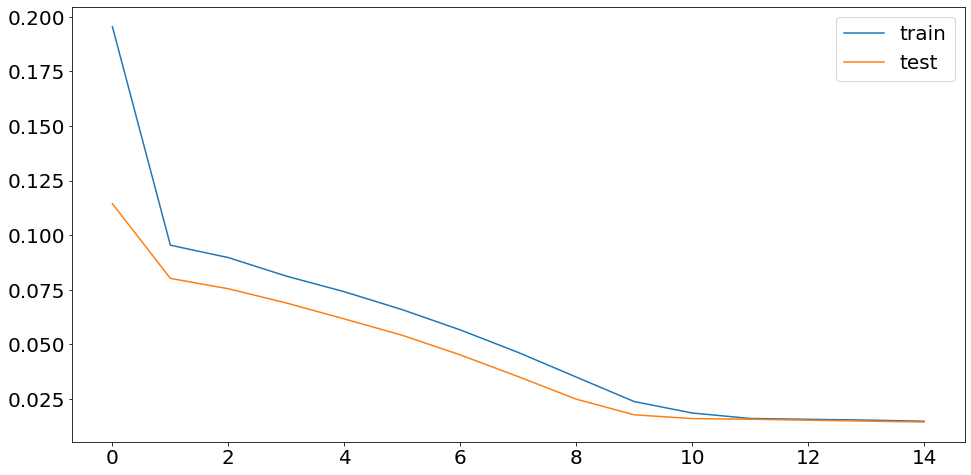

In [330]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=15, batch_size=96, validation_data=(val_X, val_y), verbose=2, shuffle=False)
# plot history
fig = pyplot.figure()
fig.set_size_inches(16, 8)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [331]:
# make a prediction
yhat = model.predict(test_X)

21/21 [==============================] - 1s 2ms/step


In [332]:
yhat = yhat.reshape(test_y.shape)

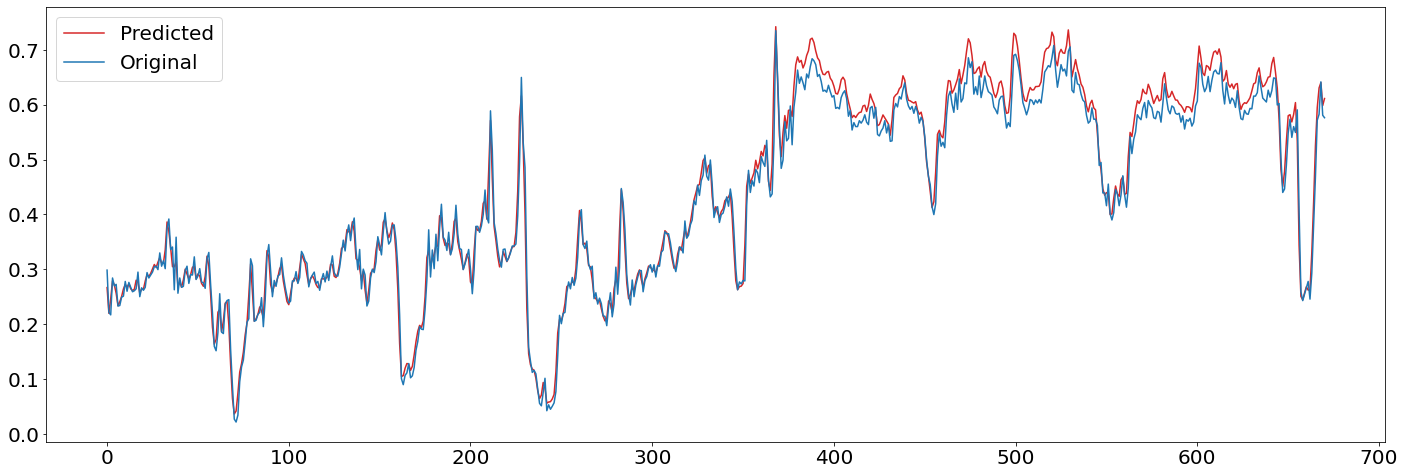

<Figure size 72x72 with 0 Axes>

<Figure size 72x72 with 0 Axes>

In [333]:
fig = pyplot.figure()
 
fig.set_size_inches(24, 8)
pyplot.plot(yhat,color="tab:red")
pyplot.plot(test_y,color="tab:blue")
pyplot.legend(['Predicted','Original'])
pyplot.show()
pyplot.figure(figsize=(1,1))

In [334]:
target = 'field8'

yhat1 = yhat.reshape(test_y.shape)
yhat1 = (yhat*(data[target].max()-data[target].min())) + data[target].min()
test_y1 = (test_y*(data[target].max()-data[target].min())) + data[target].min()

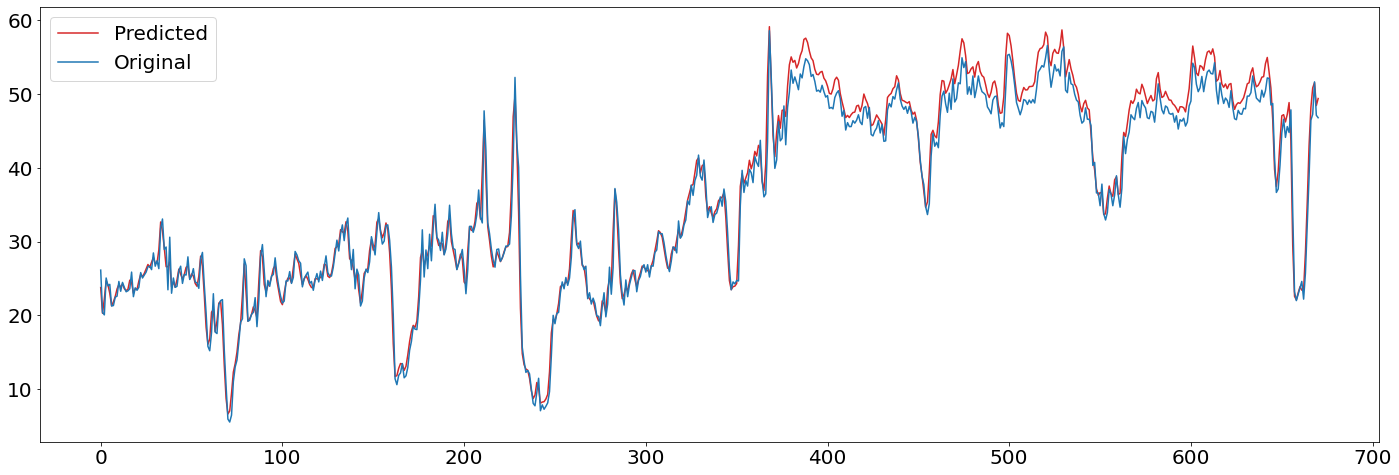

<Figure size 72x72 with 0 Axes>

<Figure size 72x72 with 0 Axes>

In [335]:
fig = pyplot.figure()
 
fig.set_size_inches(24, 8)
pyplot.plot(yhat1,color="tab:red")
pyplot.plot(test_y1,color="tab:blue")
pyplot.legend(['Predicted','Original'])
pyplot.show()
pyplot.figure(figsize=(1,1))

In [336]:
rmse = sqrt(mean_squared_error(yhat1, test_y1))
print('Test RMSE: %.3f' % rmse)
from sklearn.metrics import r2_score
r2Score = r2_score(yhat1, test_y1)
print('R2 Score:%.3f'%r2Score)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yhat1, test_y1)
print('Mean Absolute Error:%.3f'%mae)

Test RMSE: 1.823
R2 Score:0.981
Mean Absolute Error:1.431


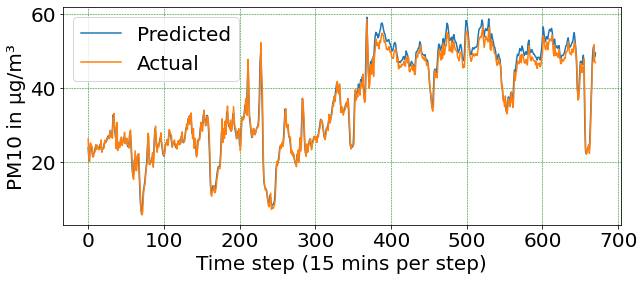

In [337]:
ylabels = 'PM10 in µg/m³'#'SO2 in ppb'#

import matplotlib.pyplot as plt

df = pd.DataFrame(data={'Predictions':yhat1, 'Actuals':test_y1})
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10, 4))
plt.plot(df['Predictions'], label='Predicted')
plt.plot(df['Actuals'], label='Actual')
plt.xlabel('Time step (15 mins per step)')
plt.ylabel(ylabels)
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

In [277]:
yhat1

array([ 161.63168 ,  117.27831 ,  273.05014 ,  447.8639  ,  508.77094 ,
        463.75714 ,  461.95755 ,  467.0832  ,  512.02783 ,  747.0928  ,
        700.5481  ,  323.67877 ,  404.78604 ,  513.2473  ,  399.7273  ,
        313.98828 ,  234.26508 ,  226.10356 ,  192.80898 ,  258.77466 ,
        377.46222 ,  365.58716 ,  336.41595 ,  308.89865 ,  368.78113 ,
        465.3634  ,  611.6655  ,  664.71606 ,  918.13794 , 1144.6989  ,
        865.3253  ,  764.06885 ,  879.4088  ,  983.0797  ,  969.27936 ,
        848.17804 ,  689.0024  ,  582.8318  ,  776.02466 ,  360.4198  ,
        306.3729  ,  182.79997 ,  235.89844 ,  301.12457 ,  242.93025 ,
        560.92883 ,  704.1999  ,  402.66162 ,  355.93945 ,  576.4825  ,
        400.6258  ,  376.13565 ,  477.594   ,  628.8362  ,  482.66376 ,
        402.10406 ,  551.55865 ,  437.35837 ,   48.509224,   32.792427,
         87.32753 ,  183.44478 ,  247.82173 ,  324.1748  ,  553.82654 ,
        650.7918  ,  664.2709  ,  786.99615 ,  480.68118 ,  446.

In [278]:
test_y1

array([ 176.91057 ,   63.08943 ,  207.47968 ,  410.40646 ,  513.82117 ,
        456.26013 ,  446.50403 ,  466.34146 ,  430.2439  ,  702.439   ,
        834.7967  ,  305.04065 ,  348.2927  ,  543.0894  ,  414.63412 ,
        336.26016 ,  223.41461 ,  235.12195 ,  175.93494 ,  209.75609 ,
        376.26016 ,  362.60162 ,  348.61786 ,  290.73172 ,  352.8455  ,
        416.58536 ,  611.0569  ,  606.8292  ,  805.85364 , 1224.7153  ,
        914.1463  ,  737.2358  ,  844.2276  ,  970.40643 ,  995.4471  ,
        871.2195  ,  771.38214 ,  458.86176 ,  914.7967  ,  355.77237 ,
        346.01624 ,  167.80486 ,  183.41463 ,  344.06503 ,  150.2439  ,
        478.69916 ,  787.96747 ,  450.4065  ,  252.0325  ,  634.79675 ,
        412.68292 ,  361.626   ,  413.33334 ,  667.3171  ,  532.3577  ,
        352.8455  ,  545.04065 ,  572.3577  ,   45.528454,    8.780488,
         47.47967 ,  151.21951 ,  232.19513 ,  246.82925 ,  506.34146 ,
        670.5691  ,  575.93494 ,  884.878   ,  493.00812 ,  443.